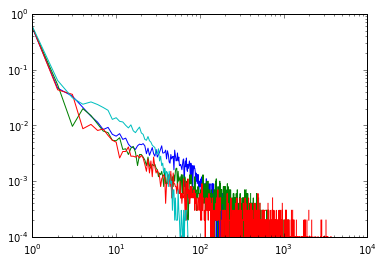

zoomed in view


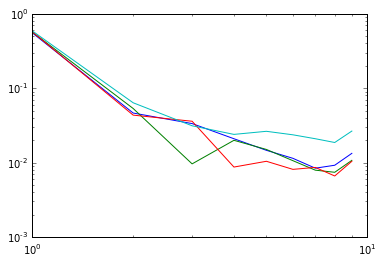

The trend shows a power law relation between probability and size of avalanche.
As you increase the size, the probability drops off at an approximately linear slope (on this log-log scale).
Thus, this is an example of a fractal pattern
or a pattern exhibiting criticality which would have no intrinsic scale


In [29]:
%matplotlib inline 
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.colorbar as cbar
from numpy.random import randn
from scipy import integrate
import matplotlib

#combo of zero and tablesize
num_grains=10000 #number of iterations
table_size_64=64 #table size for the bins, binning is done by largest table size
tb_size=[8,16,32,64] #table sizes
#tb_size=[10]
avsize=np.zeros((num_grains,len(tb_size)),dtype=np.int) #stores avalanche sizes
z_crit=4 #threshold


for i in xrange(len(tb_size)): #outer loop loops over table sizes
    table_size=tb_size[i]
    z=np.random.randint(1,4,(table_size,table_size)) #random distrutbiion for intial table
   
    add_location=(table_size/2+1,table_size/2+1) # sets the middle of the table to drop new grain

    for g in xrange(num_grains):
      
        z[add_location[0],add_location[1]] += 1 #drop a grain
      
        x=add_location[0]
        y=add_location[1]
        coor=[]
        if z[x,y] >= z_crit: #check the center first
            avsize[g,i]+=1
            z[x,y]-=4  #collapse
                   
            if x == table_size-1 and y==table_size-1:
                z[x,y-1]+=1
                if z[x,y-1] >= z_crit:
                    sur=[x,y-1]
                    coor.append(sur)
                z[x-1,y]+=1
                if z[x-1,y] >= z_crit:
                    sur=[x-1,y]
                    coor.append(sur)
            if x == 0 and y== 0:
                z[x,y+1]+=1
                if z[x,y+1] >= z_crit:
                    sur=[x,y+1]
                    coor.append(sur)
                z[x+1,y]+=1
                if z[x+1,y] >= z_crit:
                    sur=[x+1,y]
                    coor.append(sur)   
                        #fall off the y axis
            else:
                if x==0 and y==table_size-1:
                    z[x,y-1]+=1
                    if z[x,y-1] >= z_crit:
                        sur=[x,y-1]
                        coor.append(sur)
                    z[x+1,y]+=1
                    if z[x+1,y] >= z_crit:
                        sur=[x+1,y]
                        coor.append(sur)
                if x==table_size-1 and y==0:
                    z[x,y+1]+=1
                    if z[x,y+1] >= z_crit:
                        sur=[x,y+1]
                        coor.append(sur)
                    z[x-1,y]+=1
                    if z[x-1,y] >= z_crit:
                        sur=[x-1,y]
                        coor.append(sur)
                else:
                    if x == table_size-1 and y!=0 and y!=table_size-1:
                        z[x,y+1]+=1
                        if z[x,y+1] >= z_crit:
                            sur=[x,y+1]
                            coor.append(sur)
                        z[x,y-1]+=1
                        if z[x,y-1] >= z_crit:
                            sur=[x,y-1]
                            coor.append(sur)
                        z[x-1,y]+=1
                        if z[x-1,y] >= z_crit:
                            sur=[x-1,y]
                            coor.append(sur)
                        #fall off the x axis
                    if x == 0 and y!=0 and y!=table_size-1:
                        z[x,y+1]+=1
                        if z[x,y+1] >= z_crit:
                            sur=[x,y+1]
                            coor.append(sur)
                        z[x,y-1]+=1
                        if z[x,y-1] >= z_crit:
                            sur=[x,y-1]
                            coor.append(sur)
                        z[x+1,y]+=1
                        if z[x+1,y] >= z_crit:
                            sur=[x+1,y]
                            coor.append(sur)
                 
                        #fall off the y axis
                    if y == table_size-1 and x!=0 and x!=table_size-1:
                        z[x+1,y]+=1
                        if z[x+1,y] >= z_crit:
                            sur=[x+1,y]
                            coor.append(sur)
                        z[x-1,y]+=1
                        if z[x-1,y] >= z_crit:
                            sur=[x-1,y]
                            coor.append(sur)
                        z[x,y-1]+=1
                        if z[x,y-1] >= z_crit:
                            sur=[x,y-1]
                            coor.append(sur)
                    if y == 0 and x!=0 and x!=table_size-1:
                        z[x+1,y]+=1
                        if z[x+1,y] >= z_crit:
                            sur=[x+1,y]
                            coor.append(sur)
                        z[x-1,y]+=1
                        if z[x-1,y] >= z_crit:
                            sur=[x-1,y]
                            coor.append(sur)
                        z[x,y+1]+=1
                        if z[x,y+1] >= z_crit:
                            sur=[x,y+1]
                            coor.append(sur)
                    else:
                        if x < table_size-1 and y < table_size-1 and x>0 and y>0:
                            z[x+1,y]+=1
                            if z[x+1,y] >= z_crit:
                                sur=[x+1,y]
                                coor.append(sur)
                            z[x-1,y]+=1
                            if z[x-1,y] >= z_crit:
                                sur=[x-1,y]
                                coor.append(sur)
                                
                            z[x,y+1]+=1
                            if z[x,y+1] >= z_crit:
                                sur=[x,y+1]
                                coor.append(sur)
                            z[x,y-1]+=1
                            if z[x,y-1] >= z_crit:
                                sur=[x,y-1]
                                coor.append(sur)
        
        while len(coor)>0:
            #print coor
            coor2=[]
            coor2=coor
            coor=[]
            for a in xrange(0,len(coor2)):                
                x=coor2[a][0]
                y=coor2[a][1]
                #print x,y
                if z[x,y] >= z_crit: #check the center first
                    avsize[g,i]+=1
                    z[x,y]-=4  #collapse
                        #now relax and also check the relaxed places                      

                    if x == table_size-1 and y==table_size-1:
                        z[x,y-1]+=1
                        if z[x,y-1] >= z_crit:
                            sur=[x,y-1]
                            coor.append(sur)
                        z[x-1,y]+=1
                        if z[x-1,y] >= z_crit:
                            sur=[x-1,y]
                            coor.append(sur)
                    if x == 0 and y== 0:
                        z[x,y+1]+=1
                        if z[x,y+1] >= z_crit:
                            sur=[x,y+1]
                            coor.append(sur)
                        z[x+1,y]+=1
                        if z[x+1,y] >= z_crit:
                            sur=[x+1,y]
                            coor.append(sur)   
                        #fall off the y axis
                    else:
                        if x==0 and y==table_size-1:
                            z[x,y-1]+=1
                            if z[x,y-1] >= z_crit:
                                sur=[x,y-1]
                                coor.append(sur)
                            z[x+1,y]+=1
                            if z[x+1,y] >= z_crit:
                                sur=[x+1,y]
                                coor.append(sur)
                        if x==table_size-1 and y==0:
                            z[x,y+1]+=1
                            if z[x,y+1] >= z_crit:
                                sur=[x,y+1]
                                coor.append(sur)
                            z[x-1,y]+=1
                            if z[x-1,y] >= z_crit:
                                sur=[x-1,y]
                                coor.append(sur)
                        else:
                            if x == table_size-1 and y!=0 and y!=table_size-1:
                                z[x,y+1]+=1
                                if z[x,y+1] >= z_crit:
                                    sur=[x,y+1]
                                    coor.append(sur)
                                z[x,y-1]+=1
                                if z[x,y-1] >= z_crit:
                                    sur=[x,y-1]
                                    coor.append(sur)
                                z[x-1,y]+=1
                                if z[x-1,y] >= z_crit:
                                    sur=[x-1,y]
                                    coor.append(sur)
                        #fall off the y axis
                            if x == 0 and y!=0 and y!=table_size-1:
                                z[x,y+1]+=1
                                if z[x,y+1] >= z_crit:
                                    sur=[x,y+1]
                                    coor.append(sur)
                                z[x,y-1]+=1
                                if z[x,y-1] >= z_crit:
                                    sur=[x,y-1]
                                    coor.append(sur)
                                z[x+1,y]+=1
                                if z[x+1,y] >= z_crit:
                                    sur=[x+1,y]
                                    coor.append(sur)
                 
                        #fall off the y axis
                            if y == table_size-1 and x>0 and x<table_size-1:
                                z[x+1,y]+=1
                                if z[x+1,y] >= z_crit:
                                    sur=[x+1,y]
                                    coor.append(sur)
                                z[x-1,y]+=1
                                if z[x-1,y] >= z_crit:
                                    sur=[x-1,y]
                                    coor.append(sur)
                                z[x,y-1]+=1
                                if z[x,y-1] >= z_crit:
                                    sur=[x,y-1]
                                    coor.append(sur)
                            if y == 0 and x!=0 and x!=table_size-1:
                                z[x+1,y]+=1
                                if z[x+1,y] >= z_crit:
                                    sur=[x+1,y]
                                    coor.append(sur)
                                z[x-1,y]+=1
                                if z[x-1,y] >= z_crit:
                                    sur=[x-1,y]
                                    coor.append(sur)
                                z[x,y+1]+=1
                                if z[x,y+1] >= z_crit:
                                    sur=[x,y+1]
                                    coor.append(sur)
                            else:
                                if x < table_size-1 and y < table_size-1 and x >0 and y >0:
                                    z[x+1,y]+=1
                                    if z[x+1,y] >= z_crit:
                                        sur=[x+1,y]
                                        coor.append(sur)
                                    z[x-1,y]+=1
                                    if z[x-1,y] >= z_crit:
                                        sur=[x-1,y]
                                        coor.append(sur)
                                
                                    z[x,y+1]+=1
                                    if z[x,y+1] >= z_crit:
                                        sur=[x,y+1]
                                        coor.append(sur)
                                    z[x,y-1]+=1
                                    if z[x,y-1] >= z_crit:
                                        sur=[x,y-1]
                                        coor.append(sur)
                        #fall off the x axis
            
table=table_size_64*table_size_64

table=np.linspace(0,table,num=table+1)
hist1, bins=np.histogram(avsize[:,1],bins=table)
hist2, bins=np.histogram(avsize[:,2],bins=table)
hist3, bins=np.histogram(avsize[:,3],bins=table)
hist4, bins=np.histogram(avsize[:,0],bins=table)
prob1 = np.divide(hist1,num_grains,dtype=float)
prob2 = np.divide(hist2,num_grains,dtype=float)
prob3 = np.divide(hist3,num_grains,dtype=float)
prob4 = np.divide(hist4,num_grains,dtype=float)


plt.loglog(bins[1:], prob1)
plt.loglog(bins[1:], prob2)
plt.loglog(bins[1:], prob3)
plt.loglog(bins[1:], prob4)

plt.show()
#zoomed in view
hist1, bins=np.histogram(avsize[:,1],bins=table[0:10])
hist2, bins=np.histogram(avsize[:,2],bins=table[0:10])
hist3, bins=np.histogram(avsize[:,3],bins=table[0:10])
hist4, bins=np.histogram(avsize[:,0],bins=table[0:10])
prob1 = np.divide(hist1,num_grains,dtype=float)
prob2 = np.divide(hist2,num_grains,dtype=float)
prob3 = np.divide(hist3,num_grains,dtype=float)
prob4 = np.divide(hist4,num_grains,dtype=float)


plt.loglog(bins[1:], prob1)
plt.loglog(bins[1:], prob2)
plt.loglog(bins[1:], prob3)
plt.loglog(bins[1:], prob4)
print "zoomed in view"
plt.show()
print "The trend shows a power law relation between probability and size of avalanche." 
print "As you increase the size, the probability drops off at an approximately linear slope (on this log-log scale)." 
print "Thus, this is an example of a fractal pattern"
print "or a pattern exhibiting criticality which would have no intrinsic scale"

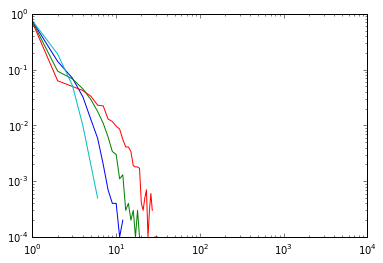

In the non-conservative sandpile model, there is no clear linear relationship
between probability and size of avalanche.
Intead, the probability seems to plateau, and then promptly drop off
as avalanche size increases.
The non-conservative nature of this model makes it not exihibit criticality
and thus there is no power relation between probabiltiy and avalanche size


In [34]:
%matplotlib inline 
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.colorbar as cbar
from numpy.random import randn
from scipy import integrate
import matplotlib

#combo of zero and tablesize
num_grains=10000 #number of iterations
table_size_64=64 #table size for the bins, binning is done by largest table size
pr=[0.25,0.5,.75,1] #probabilities
#tb_size=[10]
avsize=np.zeros((num_grains,len(tb_size)),dtype=np.int) #stores avalanche sizes
z_crit=4 #threshold


for i in xrange(len(pr)):#this outer loop loops over the probabilties
    p=pr[i]
    z=np.random.randint(1,4,(table_size,table_size))
    add_location=(table_size/2+1,table_size/2+1) # sets the middle of the table for grain dropping
    randdis=np.random.randint(1,5,(table_size,table_size))
    for g in xrange(num_grains):
        z[add_location[0],add_location[1]] += 1 #drop a grain
       
        x=add_location[0]
        y=add_location[1]
        coor=[]
        if z[x,y] >= z_crit: #check the center first
            avsize[g,i]+=1
            z[x,y]-=4  #collapse
            grains=int(p*4) # number of grains passed on                  
                   
            if x == table_size-1 and y==table_size-1:
                for b in xrange(grains):
                    ran=np.random.randint(1,3,grains)
                    if ran[b]==1:
                        z[x,y-1]+=1
                        if z[x,y-1] >= z_crit:
                            sur=[x,y-1]
                            coor.append(sur)
                    if ran[b]==2:       
                        z[x-1,y]+=1
                        if zid[x-1,y] >= z_crit:
                            sur=[x-1,y]
                            coor.append(sur)
            if x == 0 and y== 0:
                for b in xrange(grains):
                    ran=np.random.randint(1,3,grains)
                    if ran[b]==1:
                        z[x,y+1]+=1
                        if z[x,y+1] >= z_crit:
                            sur=[x,y+1]
                            coor.append(sur)
                    if ran[b]==2: 
                        z[x+1,y]+=1
                        if z[x+1,y] >= z_crit:
                            sur=[x+1,y]
                            coor.append(sur)   
                        #fall off the y axis
            else:

                if x==0 and y==table_size-1:
                    for b in xrange(grains):
                        ran=np.random.randint(1,3,grains)
                        if ran[b]==1:
                            z[x,y-1]+=1
                            if z[x,y-1] >= z_crit:
                                sur=[x,y-1]
                                coor.append(sur)
                        if ran[b]==1:
                            z[x+1,y]+=1
                            if z[x+1,y] >= z_crit:
                                sur=[x+1,y]
                                coor.append(sur)
                if x==table_size-1 and y==0:
                    for b in xrange(grains):
                        ran=np.random.randint(1,3,grains)
                        if ran[b]==1:
                            z[x,y+1]+=1
                            if z[x,y+1] >= z_crit:
                                sur=[x,y+1]
                                coor.append(sur)
                        if ran[b]==2:
                            z[x-1,y]+=1
                            if z[x-1,y] >= z_crit:
                                sur=[x-1,y]
                                coor.append(sur)
                else:
                    if x == table_size-1 and y!=0 and y!=table_size-1:
                        for b in xrange(grains):
                            ran=np.random.randint(1,4,grains)
                            if ran[b]==1:
                                z[x,y+1]+=1
                                if z[x,y+1] >= z_crit:
                                    sur=[x,y+1]
                                    coor.append(sur)
                            if ran[b]==2:
                                z[x,y-1]+=1
                                if z[x,y-1] >= z_crit:
                                    sur=[x,y-1]
                                    coor.append(sur)
                            if ran[b]==3:
                                z[x-1,y]+=1
                                if z[x-1,y] >= z_crit:
                                    sur=[x-1,y]
                                    coor.append(sur)
                        #fall off the x axis
                    if x == 0 and y!=0 and y!=table_size-1:
                        for b in xrange(grains):
                            ran=np.random.randint(1,4,grains)
                            if ran[b]==1:
                                z[x,y+1]+=1
                                if z[x,y+1] >= z_crit:
                                    sur=[x,y+1]
                                    coor.append(sur)
                            if ran[b]==2:
                                z[x,y-1]+=1
                                if z[x,y-1] >= z_crit:
                                    sur=[x,y-1]
                                    coor.append(sur)
                            if ran[b]==3:
                                z[x+1,y]+=1
                                if z[x+1,y] >= z_crit:
                                    sur=[x+1,y]
                                    coor.append(sur)
                 
                        #fall off the y axis
                    if y == table_size-1 and x!=0 and x!=table_size-1:
                        for b in xrange(grains):
                            ran=np.random.randint(1,4,grains)
                            if ran[b]==1:                      
                                z[x+1,y]+=1
                                if z[x+1,y] >= z_crit:
                                    sur=[x+1,y]
                                    coor.append(sur)
                            if ran[b]==2: 
                                z[x-1,y]+=1
                                if z[x-1,y] >= z_crit:
                                    sur=[x-1,y]
                                    coor.append(sur)
                            if ran[b]==3: 
                                z[x,y-1]+=1
                                if z[x,y-1] >= z_crit:
                                    sur=[x,y-1]
                                    coor.append(sur)
                    if y == 0 and x!=0 and x!=table_size-1:
                        for b in xrange(grains):
                            ran=np.random.randint(1,4,grains)
                            if ran[b]==1:  
                                z[x+1,y]+=1
                                if z[x+1,y] >= z_crit:
                                    sur=[x+1,y]
                                    coor.append(sur)
                            if ran[b]==2:  
                                z[x-1,y]+=1
                                if z[x-1,y] >= z_crit:
                                    sur=[x-1,y]
                                    coor.append(sur)
                            if ran[b]==3: 
                                z[x,y+1]+=1
                                if z[x,y+1] >= z_crit:
                                    sur=[x,y+1]
                                    coor.append(sur)
                    else:
                        if x < table_size-1 and y < table_size-1 and x>0 and y>0:
                            for b in xrange(grains):
                                ran=np.random.randint(1,4,grains)
                                if ran[b]==1:  
                                    z[x+1,y]+=1
                                    if z[x+1,y] >= z_crit:
                                        sur=[x+1,y]
                                        coor.append(sur)
                                if ran[b]==2:  
                                    z[x-1,y]+=1
                                    if z[x-1,y] >= z_crit:
                                        sur=[x-1,y]
                                        coor.append(sur)
                                if ran[b]==3: 
                                    z[x,y+1]+=1
                                    if z[x,y+1] >= z_crit:
                                        sur=[x,y+1]
                                        coor.append(sur)
                                if ran[b]==4:
                                    z[x,y-1]+=1
                                    if z[x,y-1] >= z_crit:
                                        sur=[x,y-1]
                                        coor.append(sur)
        
        while len(coor)>0:
            #print coor
            coor2=[]
            coor2=coor
            coor=[]
            for a in xrange(0,len(coor2)):                
                x=coor2[a][0]
                y=coor2[a][1]
                #print x,y
                if z[x,y] >= z_crit: #check the center first
                    avsize[g,i]+=1
                    z[x,y]-=4  #collapse
                        #now relax and also check the relaxed places                      

            if x == table_size-1 and y==table_size-1:
                for b in xrange(grains):
                    ran=np.random.randint(1,3,grains)
                    if ran[b]==1:
                        z[x,y-1]+=1
                        if z[x,y-1] >= z_crit:
                            sur=[x,y-1]
                            coor.append(sur)
                    if ran[b]==2:       
                        z[x-1,y]+=1
                        if zid[x-1,y] >= z_crit:
                            sur=[x-1,y]
                            coor.append(sur)
            if x == 0 and y== 0:
                for b in xrange(grains):
                    ran=np.random.randint(1,3,grains)
                    if ran[b]==1:
                        z[x,y+1]+=1
                        if z[x,y+1] >= z_crit:
                            sur=[x,y+1]
                            coor.append(sur)
                    if ran[b]==2: 
                        z[x+1,y]+=1
                        if z[x+1,y] >= z_crit:
                            sur=[x+1,y]
                            coor.append(sur)   
                        #fall off the y axis
            else:

                if x==0 and y==table_size-1:
                    for b in xrange(grains):
                        ran=np.random.randint(1,3,grains)
                        if ran[b]==1:
                            z[x,y-1]+=1
                            if z[x,y-1] >= z_crit:
                                sur=[x,y-1]
                                coor.append(sur)
                        if ran[b]==1:
                            z[x+1,y]+=1
                            if z[x+1,y] >= z_crit:
                                sur=[x+1,y]
                                coor.append(sur)
                if x==table_size-1 and y==0:
                    for b in xrange(grains):
                        ran=np.random.randint(1,3,grains)
                        if ran[b]==1:
                            z[x,y+1]+=1
                            if z[x,y+1] >= z_crit:
                                sur=[x,y+1]
                                coor.append(sur)
                        if ran[b]==2:
                            z[x-1,y]+=1
                            if z[x-1,y] >= z_crit:
                                sur=[x-1,y]
                                coor.append(sur)
                else:
                    if x == table_size-1 and y!=0 and y!=table_size-1:
                        for b in xrange(grains):
                            ran=np.random.randint(1,4,grains)
                            if ran[b]==1:
                                z[x,y+1]+=1
                                if z[x,y+1] >= z_crit:
                                    sur=[x,y+1]
                                    coor.append(sur)
                            if ran[b]==2:
                                z[x,y-1]+=1
                                if z[x,y-1] >= z_crit:
                                    sur=[x,y-1]
                                    coor.append(sur)
                            if ran[b]==3:
                                z[x-1,y]+=1
                                if z[x-1,y] >= z_crit:
                                    sur=[x-1,y]
                                    coor.append(sur)
                        #fall off the x axis
                    if x == 0 and y!=0 and y!=table_size-1:
                        for b in xrange(grains):
                            ran=np.random.randint(1,4,grains)
                            if ran[b]==1:
                                z[x,y+1]+=1
                                if z[x,y+1] >= z_crit:
                                    sur=[x,y+1]
                                    coor.append(sur)
                            if ran[b]==2:
                                z[x,y-1]+=1
                                if z[x,y-1] >= z_crit:
                                    sur=[x,y-1]
                                    coor.append(sur)
                            if ran[b]==3:
                                z[x+1,y]+=1
                                if z[x+1,y] >= z_crit:
                                    sur=[x+1,y]
                                    coor.append(sur)
                 
                        #fall off the y axis
                    if y == table_size-1 and x!=0 and x!=table_size-1:
                        for b in xrange(grains):
                            ran=np.random.randint(1,4,grains)
                            if ran[b]==1:                      
                                z[x+1,y]+=1
                                if z[x+1,y] >= z_crit:
                                    sur=[x+1,y]
                                    coor.append(sur)
                            if ran[b]==2: 
                                z[x-1,y]+=1
                                if z[x-1,y] >= z_crit:
                                    sur=[x-1,y]
                                    coor.append(sur)
                            if ran[b]==3: 
                                z[x,y-1]+=1
                                if z[x,y-1] >= z_crit:
                                    sur=[x,y-1]
                                    coor.append(sur)
                    if y == 0 and x!=0 and x!=table_size-1:
                        for b in xrange(grains):
                            ran=np.random.randint(1,4,grains)
                            if ran[b]==1:  
                                z[x+1,y]+=1
                                if z[x+1,y] >= z_crit:
                                    sur=[x+1,y]
                                    coor.append(sur)
                            if ran[b]==2:  
                                z[x-1,y]+=1
                                if z[x-1,y] >= z_crit:
                                    sur=[x-1,y]
                                    coor.append(sur)
                            if ran[b]==3: 
                                z[x,y+1]+=1
                                if z[x,y+1] >= z_crit:
                                    sur=[x,y+1]
                                    coor.append(sur)
                    else:
                        if x < table_size-1 and y < table_size-1 and x>0 and y>0:
                            for b in xrange(grains):
                                ran=np.random.randint(1,4,grains)
                                if ran[b]==1:  
                                    z[x+1,y]+=1
                                    if z[x+1,y] >= z_crit:
                                        sur=[x+1,y]
                                        coor.append(sur)
                                if ran[b]==2:  
                                    z[x-1,y]+=1
                                    if z[x-1,y] >= z_crit:
                                        sur=[x-1,y]
                                        coor.append(sur)
                                if ran[b]==3: 
                                    z[x,y+1]+=1
                                    if z[x,y+1] >= z_crit:
                                        sur=[x,y+1]
                                        coor.append(sur)
                                if ran[b]==4:
                                    z[x,y-1]+=1
                                    if z[x,y-1] >= z_crit:
                                        sur=[x,y-1]
                                        coor.append(sur)
            
table=table_size_64*table_size_64

table=np.linspace(0,table,num=table+1)
hist1, bins=np.histogram(avsize[:,1],bins=table)
hist2, bins=np.histogram(avsize[:,2],bins=table)
hist3, bins=np.histogram(avsize[:,3],bins=table)
hist4, bins=np.histogram(avsize[:,0],bins=table)
prob1 = np.divide(hist1,num_grains,dtype=float)
prob2 = np.divide(hist2,num_grains,dtype=float)
prob3 = np.divide(hist3,num_grains,dtype=float)
prob4 = np.divide(hist4,num_grains,dtype=float)


plt.loglog(bins[1:], prob1)
plt.loglog(bins[1:], prob2)
plt.loglog(bins[1:], prob3)
plt.loglog(bins[1:], prob4)

plt.show()

print "In the non-conservative sandpile model, there is no clear linear relationship" 
print "between probability and size of avalanche."
print "Intead, the probability seems to plateau, and then promptly drop off" 
print "as avalanche size increases."
print "The non-conservative nature of this model makes it not exihibit criticality" 
print "and thus there is no power relation between probabiltiy and avalanche size"